In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe=pd.read_csv("./iris.csv",names=['SW', 'SL', 'PW', 'PL', 'L'])
dataframe

,SW,SL,PW,PL,L
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#splitting the dataset into X, the inputs and Y, the output
features = dataframe.iloc[:, :-1].values
labels = dataframe.iloc[:, -1].values

In [4]:
#splitting the dataset into train dataset and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels)


In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape   # check for the rows of the data to be same


((112, 4), (38, 4), (112,), (38,))

KNN ALGORITHM

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



SUPPORT VECTOR MACHINE ALGORITHM

In [8]:
from sklearn.svm import SVC


In [9]:
#Create a svm Classifier
svm = SVC() 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm.predict(X_test)

In [10]:
print(classification_report(y_pred, y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



DECISION TREE

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt=DecisionTreeClassifier().fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_pred, y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



[Text(167.4, 195.696, 'X[3] <= 0.75\ngini = 0.666\nsamples = 112\nvalue = [38, 35, 39]'),
 Text(141.64615384615385, 152.208, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(193.15384615384616, 152.208, 'X[3] <= 1.75\ngini = 0.499\nsamples = 74\nvalue = [0, 35, 39]'),
 Text(103.01538461538462, 108.72, 'X[2] <= 4.95\ngini = 0.224\nsamples = 39\nvalue = [0, 34, 5]'),
 Text(51.50769230769231, 65.232, 'X[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(77.26153846153846, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 65.232, 'X[3] <= 1.65\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(128.76923076923077, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(180.27692307692308, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(283.2923076923077, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(257

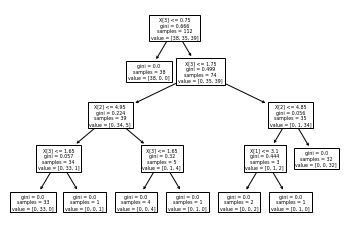

In [13]:
from sklearn.tree import plot_tree

plot_tree(dt)

RANDOM FOREST ALGORITHM

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf=RandomForestClassifier().fit(X_train,y_train)
y_pred=rf.predict(X_test)


In [16]:
print(classification_report(y_pred, y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



VOTING CLASSIFIER  

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


In [46]:

# #  ensemble of models
estimator = []
estimator.append(('RFC', rf))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC',dt))
      
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard', weights=[1,1,2],flatten_transform=True)
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_pred,y_test)
print("Hard Voting Score % 0.2f" % score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft',flatten_transform=True, weights=[2,2,2])
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(y_pred,y_test)
print("Soft Voting Score % 0.2f" % score)


Hard Voting Score  0.97
Soft Voting Score  0.97


In [32]:
from sklearn import model_selection

print('Accuracy of each Algorithm:\n')

labels = ['Support Vector', 'Random Forest', 'Decision Tree']

for clf, label in zip([svm, rf, dt], labels):
    scores = model_selection.cross_val_score(clf, X_test, y_test,cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))
    


Accuracy of each Algorithm:

Accuracy: 0.92 (+/- 0.06) [Support Vector]
Accuracy: 0.97 (+/- 0.05) [Random Forest]
Accuracy: 0.97 (+/- 0.05) [Decision Tree]
